In [3]:
#question 5
from scipy import stats

# Create a correlation matrix for numerical variables
variables = ['price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']
data = pd.read_csv('/content/listings_detailed.csv')
correlation_matrix = data[variables].corr()

print("\nCorrelation with price:")
for var in variables[1:]:
    correlation = correlation_matrix.loc['price', var]
    print(f"{var}: {correlation:.3f}")

# Compare prices for verified vs non-verified hosts
verified_prices = data[data['host_identity_verified'] == 't']['price']
non_verified_prices = data[data['host_identity_verified'] == 'f']['price']

t_stat, p_value = stats.ttest_ind(verified_prices, non_verified_prices)
print(f"\nVerified vs Non-verified Host Price Comparison:")
print(f"Average price for verified hosts: ${verified_prices.mean():.2f}")
print(f"Average price for non-verified hosts: ${non_verified_prices.mean():.2f}")
print(f"P-value: {p_value:.4f}")

NameError: name 'pd' is not defined

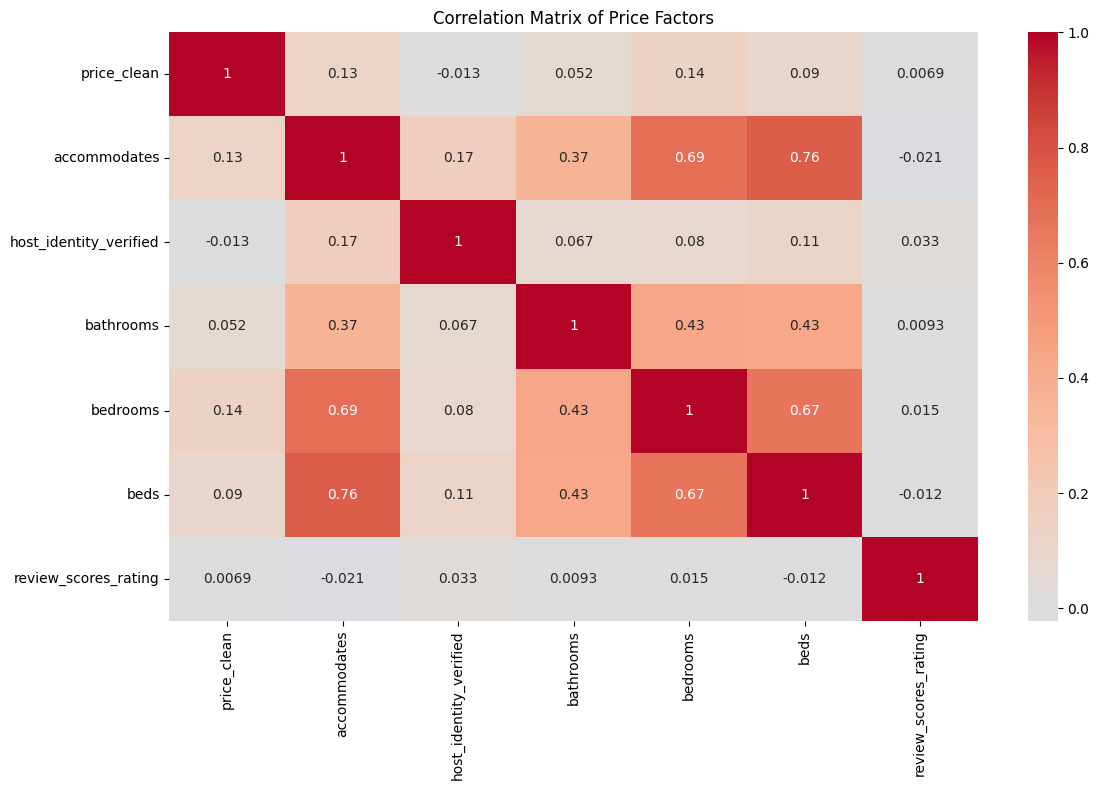

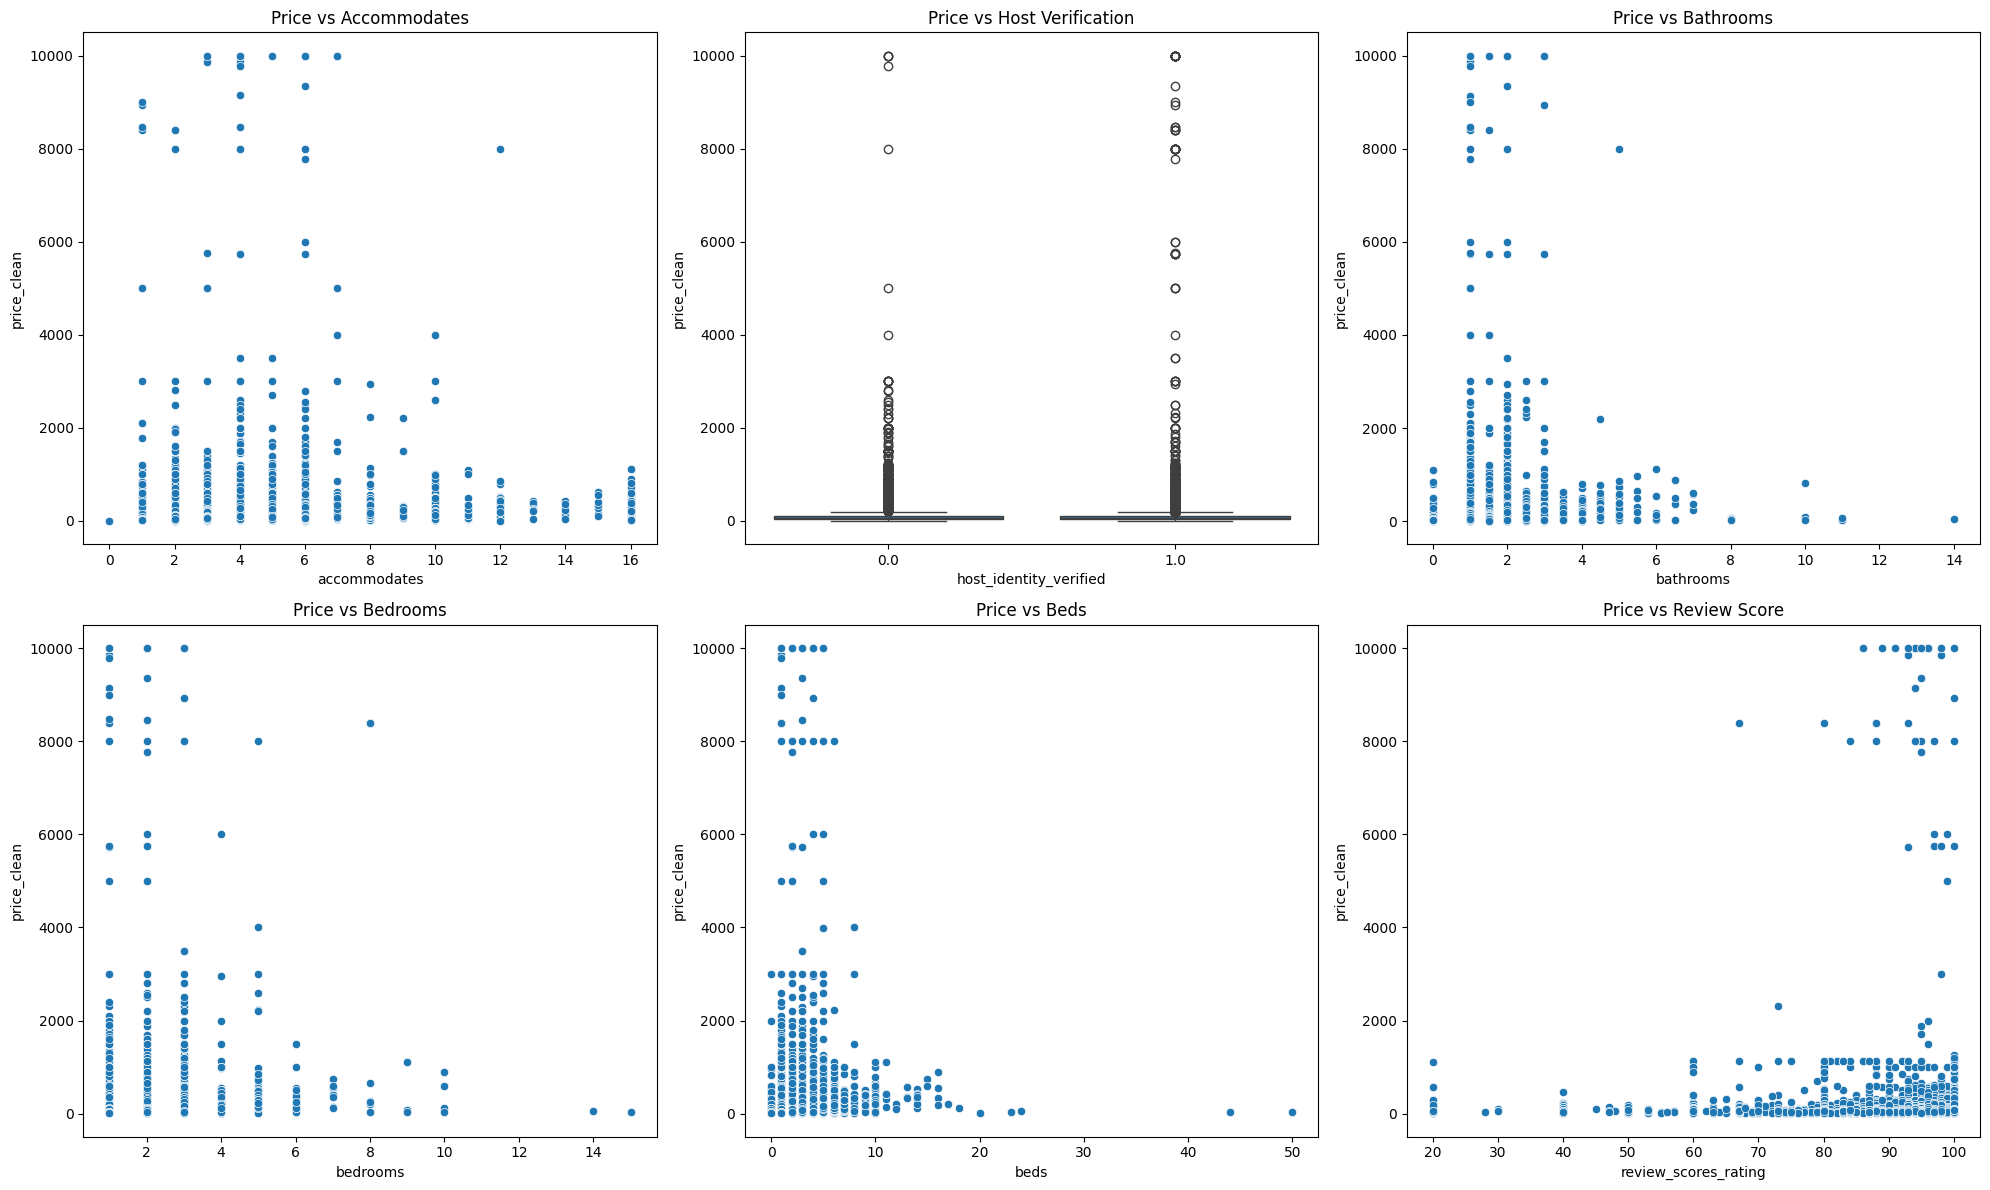


Statistical Analysis of Price Factors:
--------------------------------------------------

Correlations with Price:
price_clean               1.000000
bedrooms                  0.143674
accommodates              0.128984
beds                      0.090044
bathrooms                 0.052288
review_scores_rating      0.006931
host_identity_verified   -0.012847
Name: price_clean, dtype: float64

Verified vs Unverified Host T-Test:
t-statistic: -1.7752
p-value: 0.0759

Standardized Regression Coefficients:
                  Feature  Standardized Coefficient
3                bedrooms                 65.889824
0            accommodates                 38.323905
1  host_identity_verified                  5.443900
5    review_scores_rating                  4.922492
2               bathrooms                 -3.712387
4                    beds                -27.676893

R-squared: 0.0248

Average Prices by Factor Levels:

Verified vs Unverified Hosts:
host_identity_verified
0.0    136.978032
1.

<ipython-input-4-d7dd53eee8a3>:119: RuntimeWarning: divide by zero encountered in divide
  x_pct_change = np.diff(x) / x[:-1]
<ipython-input-4-d7dd53eee8a3>:120: RuntimeWarning: divide by zero encountered in divide
  y_pct_change = np.diff(y) / y[:-1]
<ipython-input-4-d7dd53eee8a3>:121: RuntimeWarning: invalid value encountered in divide
  return np.mean(y_pct_change / x_pct_change)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Read and prepare the data
df = pd.read_csv('/content/listings_detailed.csv')

# Clean price column
df['price_clean'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Select features for analysis
features = ['accommodates', 'host_identity_verified', 'bathrooms_text',
           'bedrooms', 'beds', 'review_scores_rating']

# Clean and prepare data
df['host_identity_verified'] = df['host_identity_verified'].map({'t': 1, 'f': 0})
df['bathrooms'] = df['bathrooms_text'].str.extract('(\d+\.?\d*)').astype(float)

# Create correlation analysis
analysis_df = df[['price_clean', 'accommodates', 'host_identity_verified',
                  'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']].copy()

# 1. Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = analysis_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Price Factors')
plt.tight_layout()
plt.show()

# 2. Individual Factor Analysis
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

# Accommodates vs Price
sns.scatterplot(data=df, x='accommodates', y='price_clean', ax=axes[0])
axes[0].set_title('Price vs Accommodates')

# Verified Host vs Price
sns.boxplot(data=df, x='host_identity_verified', y='price_clean', ax=axes[1])
axes[1].set_title('Price vs Host Verification')

# Bathrooms vs Price
sns.scatterplot(data=df, x='bathrooms', y='price_clean', ax=axes[2])
axes[2].set_title('Price vs Bathrooms')

# Bedrooms vs Price
sns.scatterplot(data=df, x='bedrooms', y='price_clean', ax=axes[3])
axes[3].set_title('Price vs Bedrooms')

# Beds vs Price
sns.scatterplot(data=df, x='beds', y='price_clean', ax=axes[4])
axes[4].set_title('Price vs Beds')

# Review Score vs Price
sns.scatterplot(data=df, x='review_scores_rating', y='price_clean', ax=axes[5])
axes[5].set_title('Price vs Review Score')

plt.tight_layout()
plt.show()

# 3. Statistical Analysis
print("\nStatistical Analysis of Price Factors:")
print("-" * 50)

# Correlation Analysis
correlations = analysis_df.corr()['price_clean'].sort_values(ascending=False)
print("\nCorrelations with Price:")
print(correlations)

# Impact of Verified Host (T-Test)
verified_prices = df[df['host_identity_verified'] == 1]['price_clean']
unverified_prices = df[df['host_identity_verified'] == 0]['price_clean']
t_stat, p_value = stats.ttest_ind(verified_prices, unverified_prices)
print("\nVerified vs Unverified Host T-Test:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Multiple Linear Regression
X = analysis_df.dropna()[['accommodates', 'host_identity_verified', 'bathrooms',
                         'bedrooms', 'beds', 'review_scores_rating']]
y = analysis_df.dropna()['price_clean']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Fit regression
model = LinearRegression()
model.fit(X_scaled, y)

# Print regression coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Standardized Coefficient': model.coef_
})
print("\nStandardized Regression Coefficients:")
print(coefficients.sort_values('Standardized Coefficient', ascending=False))

# R-squared value
r_squared = model.score(X_scaled, y)
print(f"\nR-squared: {r_squared:.4f}")

# Calculate average prices
print("\nAverage Prices by Factor Levels:")
print("\nVerified vs Unverified Hosts:")
print(df.groupby('host_identity_verified')['price_clean'].mean())

print("\nAverage Price by Number of Accommodates:")
print(df.groupby('accommodates')['price_clean'].mean().head())

# Price elasticity
def calculate_elasticity(x, y):
    x_pct_change = np.diff(x) / x[:-1]
    y_pct_change = np.diff(y) / y[:-1]
    return np.mean(y_pct_change / x_pct_change)

# Calculate average prices for each accommodates value
avg_prices_by_accommodates = df.groupby('accommodates')['price_clean'].mean()
elasticity = calculate_elasticity(avg_prices_by_accommodates.index.values,
                                avg_prices_by_accommodates.values)

print(f"\nPrice Elasticity with respect to Accommodates: {elasticity:.4f}")